In [ ]:
%%javascript 
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }

In [ ]:
from nsm import * 

## The basis functions used in the interpolant p(x) of Thm 4.18

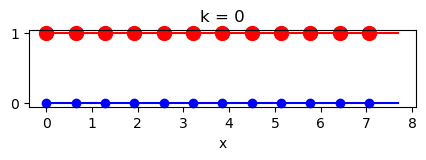

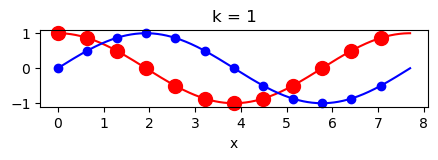

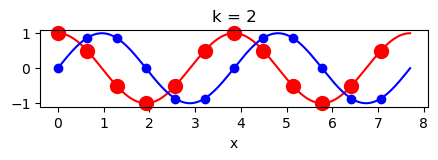

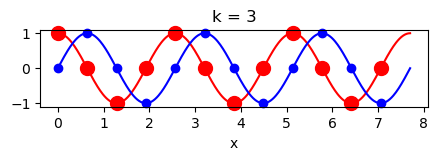

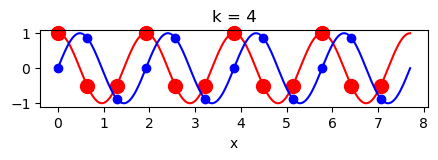

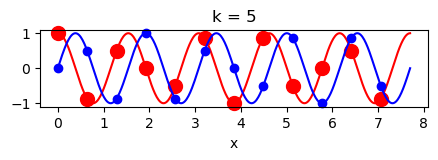

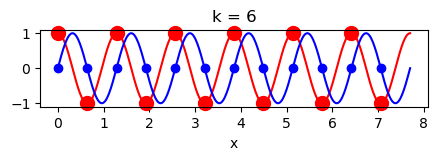

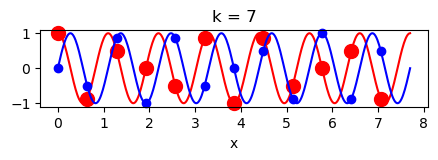

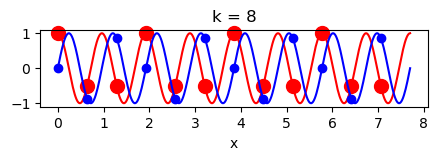

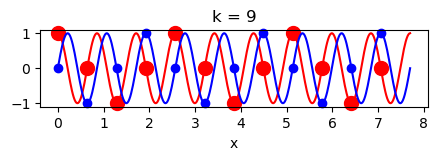

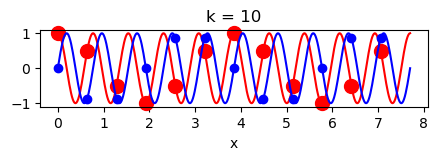

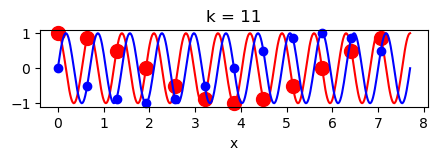

In [4]:
n = 12
L = 7.7  # arbitrary right endpoint of interval
x  = np.linspace(0,L,n,endpoint=False) # grid points
xx = np.linspace(0,L,400)  # quasi-continuum
twopi = 2*np.pi
I = 1j
for k in range(0,n):  # first let k range from 0 to n-1
    plt.figure(figsize=(5,1))
    y  = np.exp(twopi*I*k*x /L)
    yy = np.exp(twopi*I*k*xx/L)
    plt.plot(x ,np.real(y),'ro',markersize=10,clip_on=False)  # real part red
    plt.plot(xx,np.real(yy),'r')
    plt.plot(x ,np.imag(y),'bo',clip_on=False)  # imaginary part blue
    plt.plot(xx,np.imag(yy ),'b')
    plt.xlabel('x')
    plt.title(f'k = {k}')

## An alternate basis

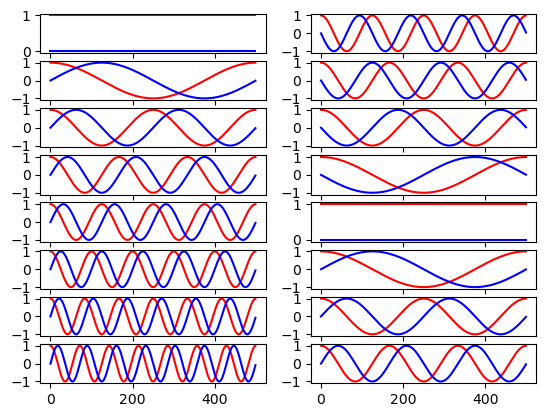

In [5]:
from nsm import *
n = 8
x = np.linspace(0,2*np.pi,500,endpoint=False)
w = np.exp(1j*x)
for j in range(n):
    plt.subplot(n,2,2*j+1)
    plt.plot(np.real(w**j),'r')
    plt.plot(np.imag(w**j),'b')
    
for j in range(-n//2,n//2):
    plt.subplot(n,2,2*j+n+2)
    plt.plot(np.real(w**j),'r')
    plt.plot(np.imag(w**j),'b')
    
# previous basis on left, alternate basis on right

# Comparison of interpolants

## p(x) of Thm 4.18 has unjustifiable oscillations at high frequency

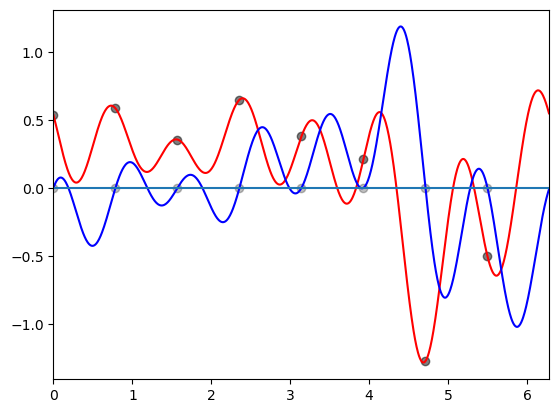

In [6]:
np.random.seed(223)
y = np.random.randn(n)
x = np.linspace(0,2*np.pi,n,endpoint=False)
plt.plot(x,y,'ko',alpha=0.5)
plt.plot(x,y*0,'ko',alpha=0.25)
nn = 1000
xx = np.linspace(0,2*np.pi,nn,endpoint=False)
ww = np.exp(1j*xx)
twopi = 2*np.pi
I = 1j
w = np.exp(-I*2*np.pi/n)
A = np.empty((n,n),dtype=complex)
v = [w**j for j in range(n)]
A[:,0] = 1
for j in range(1,n):
    A[:,j] = A[:,j-1]*v
A /= n
c = A@y
#print(c)
p = np.zeros(nn,dtype=complex)
for j in range(n):
    #print(c[j])
    p += c[j]*ww**j
plt.plot(xx,np.real(p),'r')
plt.plot(xx,np.imag(p),'b')
plt.axhline(0)
plt.xlim(0,2*np.pi);

## Use k range $-\frac{n}{2}, ... ,\frac{n}{2}-1$ instead

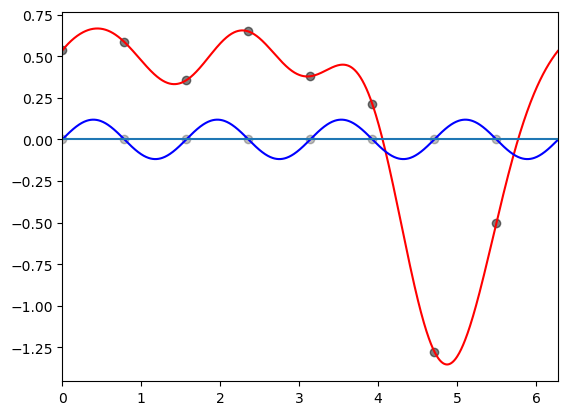

In [7]:
np.random.seed(223)
y = np.random.randn(n)
x = np.linspace(0,2*np.pi,n,endpoint=False)
plt.plot(x,y,'ko',alpha=0.5)
plt.plot(x,y*0,'ko',alpha=0.25)
nn = 1000
xx = np.linspace(0,2*np.pi,nn,endpoint=False)
ww = np.exp(1j*xx)
twopi = 2*np.pi
I = 1j
w = np.exp(-I*2*np.pi/n)
A = np.empty((n,n),dtype=complex)
v = [w**j for j in range(n)]
A[:,0] = 1
for j in range(1,n):
    A[:,j] = A[:,j-1]*v
A /= n
c = A@y
#print(c)
p = np.zeros(nn,dtype=complex)
for k in range(-n//2,n//2):
    p += c[k%n]*ww**k
plt.plot(xx,np.real(p),'r')
plt.plot(xx,np.imag(p),'b')
plt.axhline(0)
plt.xlim(0,2*np.pi);
plt.savefig('temp2.pdf')

Much better!

## And with special treatment of Nyquist frequency components

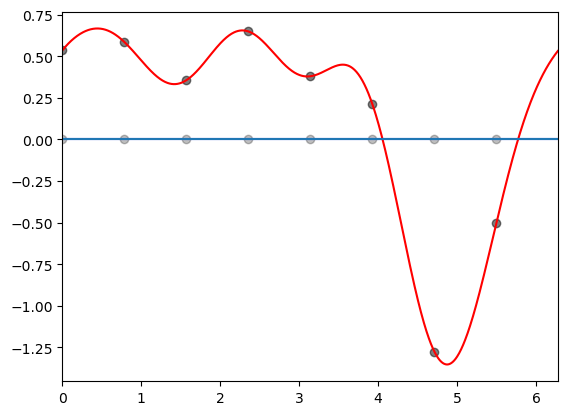

In [8]:
np.random.seed(223)
y = np.random.randn(n)
x = np.linspace(0,2*np.pi,n,endpoint=False)
plt.plot(x,y,'ko',alpha=0.5)
plt.plot(x,y*0,'ko',alpha=0.25)
nn = 1000
xx = np.linspace(0,2*np.pi,nn,endpoint=False)
ww = np.exp(1j*xx)
twopi = 2*np.pi
I = 1j
w = np.exp(-I*2*np.pi/n)
A = np.empty((n,n),dtype=complex)
v = [w**j for j in range(n)]
A[:,0] = 1
for j in range(1,n):
    A[:,j] = A[:,j-1]*v
A /= n
c = A@y
#print(c)
from numpy.fft import fft
c = fft(y)/n
p = np.zeros(nn,dtype=complex)
for k in range(-n//2+1,n//2):
    p += c[k%n]*ww**k
# now deal with the Nyquist frequency part
for k in [-n//2,n//2]:
    p += c[k%n]*ww**k/2  #half of each of them
plt.plot(xx,np.real(p),'r')
plt.plot(xx,np.imag(p),'b')
plt.axhline(0)
plt.xlim(0,2*np.pi)
plt.savefig('temp.pdf')

## Let's try band-limited trig interpolant on some previously interpolated functions

such as Runge's function

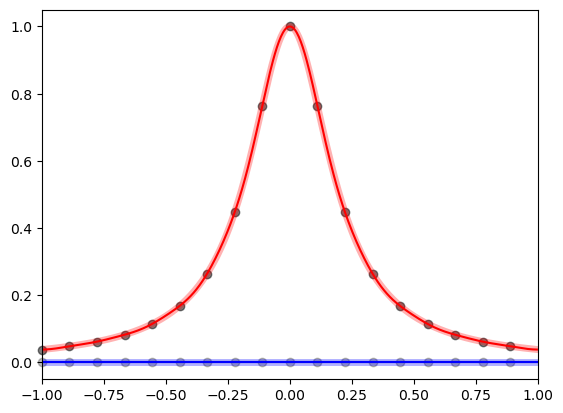

In [11]:
from numpy.fft import fft
# trig interpolant of some sampled functions
def trig_interp(F,X):
    L = X[-1]-X[0]
    twopi = 2*np.pi
    x = (twopi*(X-X[0])/L)[:-1]  #map to [0, 2pi] but don't include 2pi
    y = F(X)[:-1]
    n = len(x)
    plt.axhline(0,color='k')
    plt.plot(X[:-1],y,'ko',alpha=0.5,clip_on=False)
    plt.plot(X[:-1],y*0,'ko',alpha=0.25,clip_on=False)
    nn = 500
    xx = np.linspace(0,2*np.pi,nn,endpoint=False)
    XX = X[0] + xx*L/twopi
    ww = np.exp(1j*xx)
    twopi = 2*np.pi
    I = 1j
    c = fft(y)/n
    p = np.zeros(nn,dtype=complex)
    for k in range(-n//2+1,n//2):
        p += c[k%n]*ww**k
    # now deal with the Nyquist frequency part
    for k in [-n//2,n//2]:
        p += c[k%n]*ww**k/2  #half of each of them
    plt.plot(XX,F(XX),'r',alpha=0.3,lw=5)
    plt.plot(XX,np.real(p),'r') #lw=0.5,markersize=0.1)
    plt.plot(XX,F(XX)*0,'b',alpha=0.3,lw=5)
    plt.plot(XX,np.imag(p),'b')
    plt.xlim(X[0],X[-1])
    plt.savefig('temp.pdf')
    
def runge(x): return 1/(1+25*x**2)
X = np.linspace(-1,1,19)
trig_interp(runge,X)

def exptrig(x): return np.exp(np.cos(x) + 0.5*np.sin(x))
X = np.linspace(0,2*np.pi,6)
#trig_interp(exptrig,X)

Not bad, especially considering the periodic extension of Runge's function has discontinuous derivative at the odd integers.

Here's a function whose periodic extension is $C^\infty$:

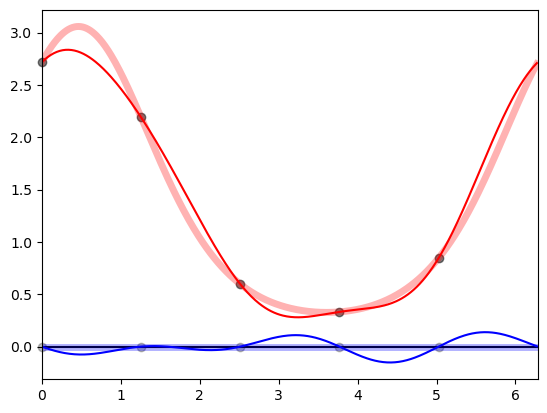

In [12]:
def exptrig(x): return np.exp( np.cos(x) + 0.5*np.sin(x) )
X = np.linspace(0,2*np.pi,6)
trig_interp(exptrig,X)

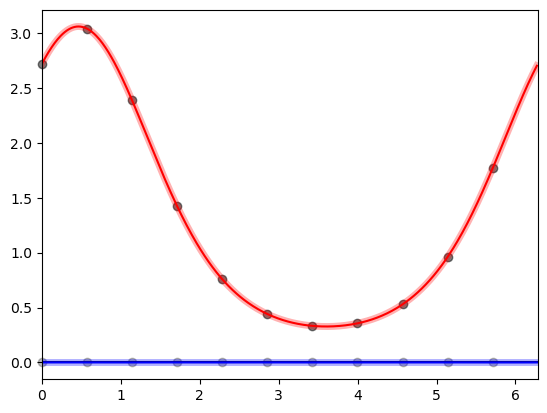

In [13]:
X = np.linspace(0,2*np.pi,12)
trig_interp(exptrig,X)

For such a function the band-limited trig interpolant gets very good very quickly as the number of nodes increases.

In [2]:
from nsm import *

# DFT of an audio recording

162030 samples


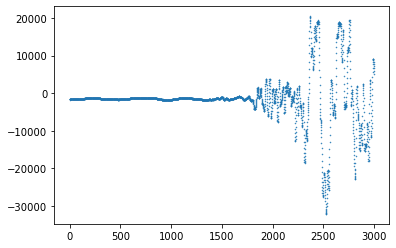

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
s,y = wavfile.read('day17/piano_low_f.wav')
s,y
print(len(y),'samples')
duration = len(y)/s
duration
jmax = 3000
plt.plot(np.arange(len(y))[:jmax],  y[:jmax], '.', markersize=1 );

Now let's look at the data "from a different angle", by applying the DFT:

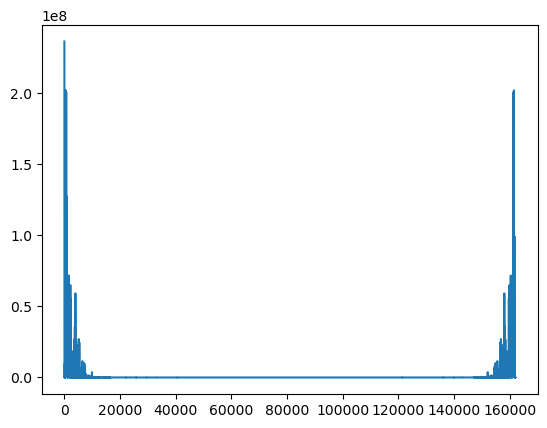

In [27]:
from numpy.fft import fft
c = fft(y)
kvals = np.arange(len(y))
plt.plot( kvals, np.abs(c) );

Zooming in on the frequencies below the Nyqist frequency:

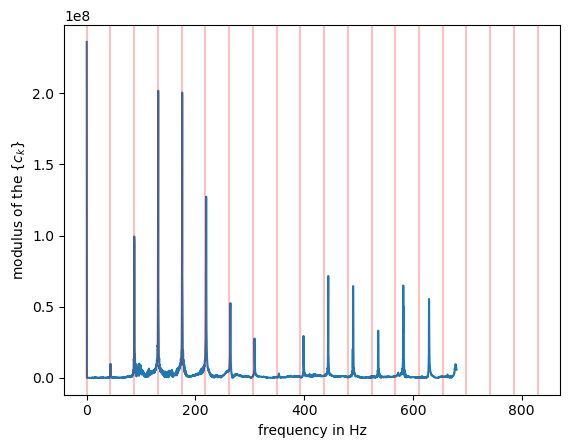

In [30]:
kmax = 2500
nu = kvals/duration      # frequency in Hz (cycles per second)
plt.plot( nu[:kmax], np.abs(c[:kmax]) )
plt.xlabel('frequency in Hz'); plt.ylabel('modulus of the $\{c_k\}$')
lowf = 43.65  # nominal frequency of the note low F
# draw pink lines at integer multiples of the nominal frequency of low F
[plt.axvline(lowf*m,color='r',alpha=0.25) for m in range(20)]; 

We can learn a lot about the signal by looking at it from this angle.